In [1]:
##El siguiente código es adaptado del código obtenido en: https://github.com/pradeepmuni/MNIST-Image-Classification-ANN/blob/master/MNIST%20-ANN.ipynb

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torchvision import datasets, transforms
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data = datasets.MNIST(root='', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


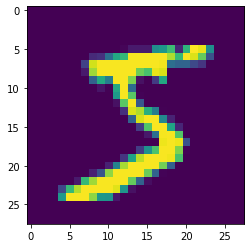

In [6]:
plt.imshow(train_data[0][0].reshape(28,28))

In [7]:
from torch.utils.data import TensorDataset, DataLoader


In [8]:
#Initializing a dataloader object which splits the training dataset into small batches of 500 records each
#and this can be used later in the ANN model training 
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=500,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=True)

In [9]:
class SimpleANN(nn.Module):
    
    def __init__(self,inp=784, op=10, layers=[120,90] ):
        
        super().__init__()
        self.layer1 = nn.Linear(inp,layers[0])
        self.layer2 = nn.Linear(layers[0],layers[1])
        self.layer3 = nn.Linear(layers[1],op)
        
    def forward(self,x):
        
        x= F.relu(self.layer1(x))
        x= F.relu(self.layer2(x))
        x= F.softmax(self.layer3(x),dim=1) #multiclass classificaiton
        
        return x

In [10]:
torch.manual_seed(101)
model = SimpleANN()
model

SimpleANN(
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=90, bias=True)
  (layer3): Linear(in_features=90, out_features=10, bias=True)
)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [12]:
epochs = 50
train_loss= []
test_loss= []
train_acc=[]
test_acc = []

print(f'\nArtificial Neural Network Model Metrics:\n')
for i in range(epochs):
    
    train_crt_pred = 0
    test_crt_pred = 0
    
    for b,(x_train,y_train) in enumerate (train_loader):
        b += 1
        y_pred = model.forward(x_train.view(500,-1))
        loss= criterion(y_pred,y_train)
        
        buffer = torch.max(y_pred.data, 1) [1]
        batch_acc = (buffer == y_train).sum()
        train_crt_pred +=  batch_acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        if b%30 == 0:
            print(f'Epoch{i:2} Batch {b:4} loss: {loss.item():5.2f} Train Accuracy: {train_crt_pred.item()*100/(500*b):6.3f}%')
    
    train_loss.append(loss)
    train_acc.append(train_crt_pred)
    
    
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate (test_loader):
            b += 1
            y_eval = model.forward(x_test.view(500,-1))
            loss= criterion(y_eval,y_test)
            buffer1 = torch.max(y_eval.data, 1) [1]
            batch_acc = (buffer1 == y_test).sum()
            test_crt_pred +=  batch_acc
    
    test_loss.append(loss)
    test_acc.append(test_crt_pred)

    print(f'After {i+1} Epoch the Train Accuracy is {(train_crt_pred.item()/60000)*100:6.3f}% and Test Accuracy is {(test_crt_pred.item()/10000)*100:6.3f}% \n')     
    
        


Artificial Neural Network Model Metrics:

Epoch 0 Batch   30 loss:  1.93 Train Accuracy: 41.160%
Epoch 0 Batch   60 loss:  1.74 Train Accuracy: 56.000%
Epoch 0 Batch   90 loss:  1.65 Train Accuracy: 64.224%
Epoch 0 Batch  120 loss:  1.64 Train Accuracy: 68.705%
After 1 Epoch the Train Accuracy is 68.705% and Test Accuracy is 83.220% 

Epoch 1 Batch   30 loss:  1.64 Train Accuracy: 83.487%
Epoch 1 Batch   60 loss:  1.62 Train Accuracy: 83.373%
Epoch 1 Batch   90 loss:  1.65 Train Accuracy: 83.676%
Epoch 1 Batch  120 loss:  1.65 Train Accuracy: 83.715%
After 2 Epoch the Train Accuracy is 83.715% and Test Accuracy is 84.540% 

Epoch 2 Batch   30 loss:  1.62 Train Accuracy: 84.533%
Epoch 2 Batch   60 loss:  1.66 Train Accuracy: 84.410%
Epoch 2 Batch   90 loss:  1.61 Train Accuracy: 84.662%
Epoch 2 Batch  120 loss:  1.61 Train Accuracy: 84.738%
After 3 Epoch the Train Accuracy is 84.738% and Test Accuracy is 84.440% 

Epoch 3 Batch   30 loss:  1.61 Train Accuracy: 85.707%
Epoch 3 Batch   6

After 28 Epoch the Train Accuracy is 98.682% and Test Accuracy is 97.360% 

Epoch28 Batch   30 loss:  1.48 Train Accuracy: 98.707%
Epoch28 Batch   60 loss:  1.48 Train Accuracy: 98.743%
Epoch28 Batch   90 loss:  1.48 Train Accuracy: 98.742%
Epoch28 Batch  120 loss:  1.47 Train Accuracy: 98.730%
After 29 Epoch the Train Accuracy is 98.730% and Test Accuracy is 97.250% 

Epoch29 Batch   30 loss:  1.48 Train Accuracy: 98.713%
Epoch29 Batch   60 loss:  1.47 Train Accuracy: 98.767%
Epoch29 Batch   90 loss:  1.48 Train Accuracy: 98.749%
Epoch29 Batch  120 loss:  1.49 Train Accuracy: 98.755%
After 30 Epoch the Train Accuracy is 98.755% and Test Accuracy is 97.340% 

Epoch30 Batch   30 loss:  1.47 Train Accuracy: 98.813%
Epoch30 Batch   60 loss:  1.47 Train Accuracy: 98.807%
Epoch30 Batch   90 loss:  1.48 Train Accuracy: 98.804%
Epoch30 Batch  120 loss:  1.48 Train Accuracy: 98.795%
After 31 Epoch the Train Accuracy is 98.795% and Test Accuracy is 97.370% 

Epoch31 Batch   30 loss:  1.48 Train

In [13]:
alltestdata= DataLoader(test_data,batch_size=10000,shuffle=True)

In [14]:
with torch.no_grad():
    for b,(x_test,y_test) in enumerate (alltestdata):
            y_eval = model.forward(x_test.view(10000,-1))
            loss= criterion(y_eval,y_test)
            buffer1 = torch.max(y_eval.data, 1) [1]
            batch_acc = (buffer1 == y_test).sum()

In [15]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test.reshape(-1,1),buffer1.reshape(-1,1),labels=[0,1,2,3,4,5,6,7,8,9]),index=[0,1,2,3,4,5,6,7,8,9],columns=[0,1,2,3,4,5,6,7,8,9]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test.reshape(-1,1),buffer1.reshape(-1,1)))


The Confusion Matrix is plotted below:


,0,1,2,3,4,5,6,7,8,9
0,966,0,1,3,1,2,4,1,2,0
1,0,1123,3,2,0,1,1,2,3,0
2,5,2,1004,5,1,0,2,7,5,1
3,0,3,4,985,0,5,1,5,7,0
4,0,0,6,0,966,0,5,1,1,3
5,3,1,0,8,2,861,7,1,7,2
6,6,1,3,1,5,3,934,0,5,0
7,0,5,9,3,2,1,0,1001,1,6
8,5,0,2,9,8,5,2,3,937,3
9,4,3,0,6,13,2,1,5,5,970



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



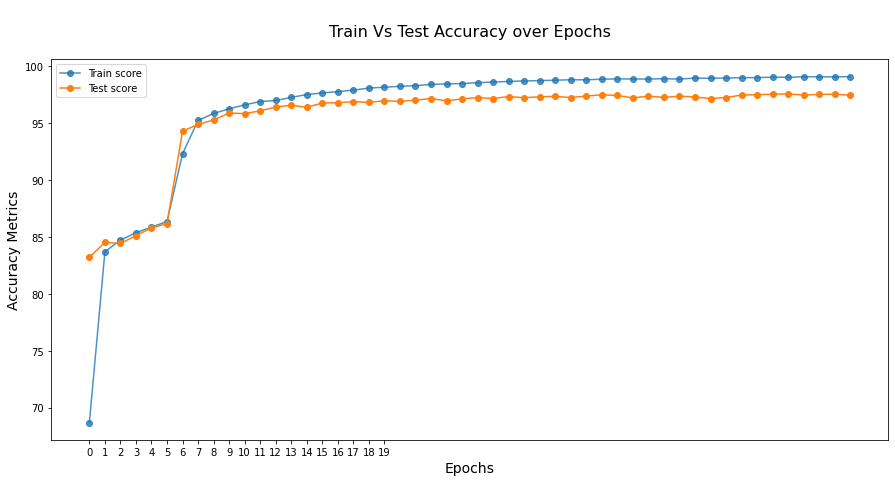

In [16]:
plt.figure(figsize=(15,7))
plt.plot([t/600 for t in train_acc], label='Train score',marker='o',alpha=0.8)
plt.plot([t/100 for t in test_acc], label='Test score',marker='o')
plt.title('\nTrain Vs Test Accuracy over Epochs\n',fontsize=16)
plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy Metrics',fontsize=14)
plt.legend();

In [19]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save